In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from collections import Counter

In [3]:
%matplotlib inline

In [4]:
ment5 = pd.read_csv('Shodhganga_mentorship.csv', sep = ",")
ment5['advisor_inst_dept']=ment5['advisor_name']+"@"+ment5['instituteId']+"@"+ment5['DepartmentId']
ment5['res_inst_dept']=ment5['researcher_name']+"@"+ment5['instituteId']+"@"+ment5['DepartmentId']
index1=pd.unique(ment5[['advisor_inst_dept', 'res_inst_dept']].values.ravel('K'))
name_index=pd.DataFrame({'names_inst_dept':index1})
name_index['rid']=name_index.index
ment5["advisorId"]=ment5['advisor_inst_dept'].map(name_index.set_index('names_inst_dept')['rid'])
ment5["researcherId"]=ment5['res_inst_dept'].map(name_index.set_index('names_inst_dept')['rid'])

In [5]:
ment5.drop(columns=['advId_1','studId_1'], inplace=True)

In [6]:
#ment5.to_csv("Sodhganga_ment_dept_inst.csv",index=False)

In [7]:
#mod_ment2.drop_duplicates(subset=['advisorId', 'researcherId'], keep='first', inplace=True)

In [8]:
ment5.columns

Index(['advisorId', 'researcherId', 'advisor_name', 'researcher_name',
       'dc.date.submitted[]', 'dc.language.iso[]', 'dc.publisher.department[]',
       'DepartmentId', 'dc.publisher.institution[]', 'instituteId',
       'dc.title[]', 'thesisId', 'dc.type.degree', 'dc.date.awarded',
       'dc.subject.ddc', 'dc.source.uri', 'dc.description.abstract',
       'dc.title.alternative', 'advisor_inst_dept', 'res_inst_dept'],
      dtype='object')

In [9]:
graph1 = nx.convert_matrix.from_pandas_edgelist(ment5, 'advisorId','researcherId')

In [10]:
dgr = graph1.degree()

In [11]:
dgr = dict(dgr)

In [13]:
sorted_dgr = dict(sorted(dgr.items(), key=lambda item: item[1],reverse=True))

In [14]:
sorted_dgr

{50529: 125,
 24090: 60,
 89241: 60,
 1775: 58,
 28006: 53,
 79021: 50,
 8085: 46,
 82700: 46,
 63121: 44,
 83345: 44,
 90457: 44,
 1382: 43,
 18925: 43,
 55622: 43,
 65617: 43,
 50356: 42,
 81305: 41,
 4050: 40,
 50147: 40,
 70784: 40,
 60608: 39,
 81317: 39,
 65089: 38,
 79022: 38,
 42250: 37,
 63092: 36,
 70777: 36,
 27824: 35,
 50731: 35,
 61973: 35,
 9268: 34,
 18947: 34,
 42251: 34,
 48347: 34,
 66380: 34,
 43136: 33,
 43143: 33,
 55619: 33,
 66385: 33,
 75428: 33,
 717: 32,
 18801: 32,
 19777: 32,
 42098: 32,
 57790: 32,
 81309: 32,
 391: 31,
 8090: 31,
 15271: 31,
 21537: 31,
 33450: 31,
 42241: 31,
 62987: 31,
 78978: 31,
 79031: 31,
 12241: 30,
 15916: 30,
 16920: 30,
 16945: 30,
 19755: 30,
 21558: 30,
 41259: 30,
 47750: 30,
 51352: 30,
 74820: 30,
 85545: 30,
 7723: 29,
 13672: 29,
 15924: 29,
 31294: 29,
 53844: 29,
 63051: 29,
 65119: 29,
 71852: 29,
 72139: 29,
 79667: 29,
 81320: 29,
 83151: 29,
 94693: 29,
 24775: 28,
 27531: 28,
 27979: 28,
 33758: 28,
 33871: 28,
 4

In [15]:
dgr_val = dgr.values()

In [16]:
dgr_dist = Counter(dgr_val)

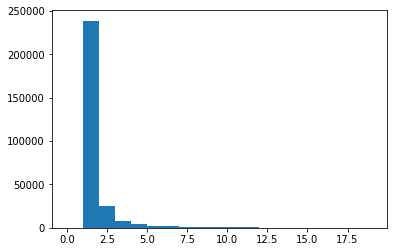

In [17]:
plt.hist(dgr_val, bins=np.arange(0,20,1))
plt.show()

In [18]:
dgr_dist

Counter({1: 238571,
         4: 4032,
         2: 24679,
         5: 2418,
         3: 7508,
         7: 1137,
         8: 912,
         9: 605,
         6: 1706,
         24: 22,
         12: 292,
         31: 9,
         10: 456,
         11: 378,
         16: 145,
         32: 6,
         14: 198,
         17: 92,
         43: 4,
         18: 67,
         15: 149,
         26: 22,
         22: 44,
         13: 232,
         58: 1,
         23: 28,
         21: 36,
         40: 3,
         20: 57,
         25: 26,
         29: 13,
         46: 2,
         27: 14,
         19: 62,
         34: 5,
         30: 11,
         60: 2,
         28: 16,
         35: 3,
         53: 1,
         37: 1,
         33: 5,
         42: 1,
         125: 1,
         39: 2,
         36: 2,
         44: 3,
         38: 2,
         50: 1,
         41: 1})